In [1909]:
import pandas as pd
import re
import random
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.probability import FreqDist
from nltk.metrics import ConfusionMatrix
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

In [1910]:
#df = pd.read_csv('news_g1.csv', sep=',', encoding = "ISO-8859-1")

In [1911]:
df = pd.read_excel('news02.xlsx')

In [1912]:
df.head()

,titulo,Link,data,classes
0,Brasil tem quase 600 mortos e passa de 12 mil ...,https://g1.globo.com/bemestar/coronavirus/noti...,2007-04-20,negativo
1,O que você precisa saber sobre a Covid-19,https://g1.globo.com/bemestar/coronavirus/noti...,2027-02-20,positivo
2,Itália tem menor número de casos de coronavíru...,https://g1.globo.com/mundo/noticia/2020/04/07/...,2007-04-20,positivo
3,'Coronavírus': MPT e TRT-15 direcionam mais R$...,https://g1.globo.com/sp/campinas-regiao/notici...,2007-04-20,positivo
4,Campinas confirma novos casos e chega a 70 inf...,https://g1.globo.com/sp/campinas-regiao/notici...,2007-04-20,negativo


In [1913]:
pattern = r'([0-3]?[0-9][\/][0-3]?\d[\/](?:[0-9]{2})?[0-9]{2})'

In [1914]:
#criar uma nova coluna com a data modificada
df['data'] = df['Link'].str.extract(pattern)

In [1915]:
df = df.dropna(subset=['data'])

In [1916]:
df['data'] = pd.to_datetime(df['data'])

In [1917]:
#labelencoder = LabelEncoder()

In [1918]:
#df['classes'] = labelencoder.fit_transform(df['classes'])

In [1919]:
#scaler = StandardScaler()

In [1920]:
#df['classes'] = scaler.fit_transform(df[['classes']])

In [1921]:
# Função para remover Stopwords da nossa base:
def RemoveStopWords(instancia):
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [1922]:
# Aplicando o stemming em nossa base:
def Stemming(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    palavras = []
    for w in instancia.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))

In [1923]:
def Limpeza_dados(instancia):
    # remove links, pontos, virgulas,ponto e virgulas dos tweets
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    return (instancia)

In [1924]:
def Preprocessing(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','').replace('"','')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [1925]:
texto = df['titulo']

In [1926]:
classe = df['classes']

In [1927]:
# Aplica a função em todos os dados:
texto = [Preprocessing(i) for i in texto]

In [1929]:
all_words = [word for tokens in texto for word in tokens]
sentence_lengths = [len(tokens) for tokens in texto]
VOCAB = sorted(list(set(all_words)))

In [1930]:
print("%s Quantidade total de palavras, com um vocabulario de %s" % (len(all_words), len(VOCAB)))
print("Tamanho máximo de uma sentença %s" % max(sentence_lengths))

20555 Quantidade total de palavras, com um vocabulario de 59
Tamanho máximo de uma sentença 123


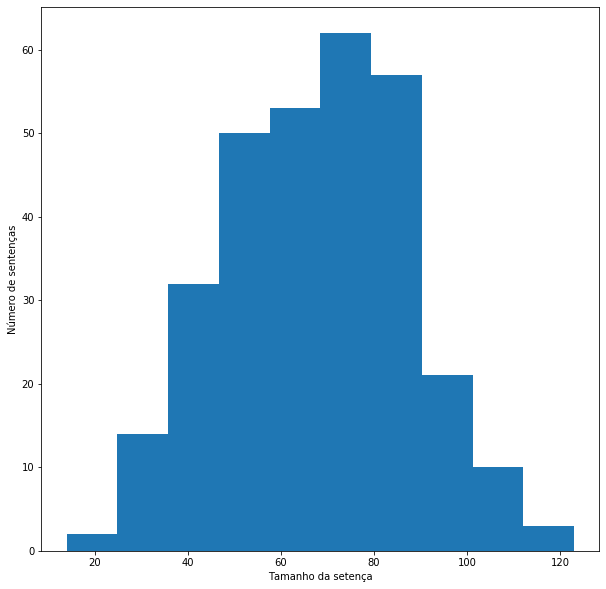

In [1931]:
#Distribuilção das sentenças por quantidade de palavras
fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Tamanho da setença')
plt.ylabel('Número de sentenças')
plt.hist(sentence_lengths)
plt.show()

In [1932]:
#contar frequencia de palavras
vectorizer = CountVectorizer(analyzer="word")

In [1933]:
# Construindo exemplos para treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(texto, classe, test_size=0.4,random_state=40)

In [1934]:
#treinar com os dados selecionados
X_train_counts = vectorizer.fit_transform(texto)

In [1935]:
# Contabilizando os termos no vocabulário aprendido para treino
X_test_counts = vectorizer.fit_transform(classe)

In [1936]:
def _tokenize_text(data):
    ls = []

    for line in data:
        tokens = wordpunct_tokenize(line)
        ls.append(tokens)

    return ls

In [1937]:
X_train_tokens = _tokenize_text(X_train)
X_test_tokens = _tokenize_text(X_test)

In [1938]:
def _apply_standardization(tokens, std_list):
    ls = []

    for tk_line in tokens:
        new_tokens = []
        
        for word in tk_line:
            if word.lower() in std_list:
                word = std_list[word.lower()]
                
            new_tokens.append(word) 
            
        ls.append(new_tokens)

    return ls

In [1939]:
def _remove_stopwords(tokens, stopword_list):
    ls = []

    for tk_line in tokens:
        new_tokens = []
        
        for word in tk_line:
            if word.lower() not in stopword_list:
                new_tokens.append(word) 
            
        ls.append(new_tokens)
        
    return ls

In [1940]:
stopword_list = []

In [1941]:
nltk_stopwords = nltk.corpus.stopwords.words('portuguese')

In [1942]:
stopwords = pd.read_csv('stopwords.txt', encoding = "ISO-8859-1")

In [1943]:
# list of array
custom_stopwords = stopwords.values.tolist()

In [1944]:
# transform list of array to list
custom_stopwords = [s[0] for s in custom_stopwords]

In [1945]:
X_train_tokens = _remove_stopwords(X_train_tokens, custom_stopwords)

In [1946]:
# check data
for i in range(0, 5):
    print(X_train_tokens[i])

['elymar', 'santos', 'volta', 'casa', 'ramos', 'ajudar', 'durante', 'pandemia']
['contrário', 'outros', 'países', ',', 'governos', 'brasil', 'méxico', 'perdem', 'popularidade', 'crise', 'coronavírus']
['eua', 'negam', 'ter', 'bloqueado', 'encomenda', 'materiais', 'médicos', 'tratar', 'coronavírus', 'havia', 'sido', 'feita', 'bahia']
['curados', 'coronavírus']
['homem', 'ferido', 'tiro', 'bala', 'borracha', 'gcm', 'desrespeitar', 'quarentena', 'grande', 'sp', 'veja', 'vídeo']


In [1947]:
#criar gráfico de núvem
def _get_text_cloud(tokens):
    text = ''

    for tk_line in tokens:
        new_tokens = []
        
        for word in tk_line:
            text += word + ' '
        
    return text

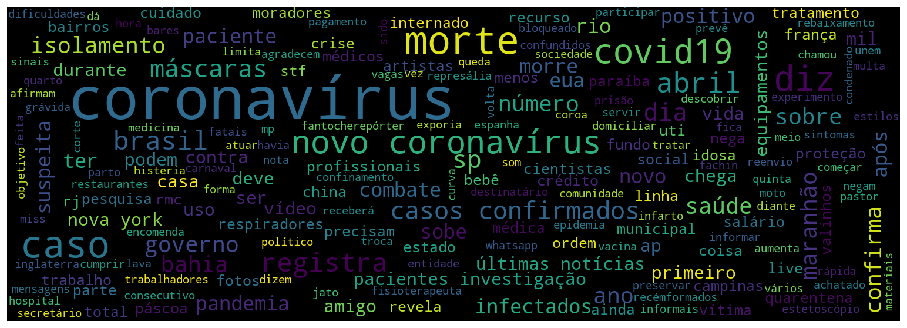

In [1948]:
# print train WordCloud
sample_train = random.sample(X_train_tokens, 100)
text_cloud = _get_text_cloud(sample_train)

word_cloud = WordCloud(max_font_size = 100, width = 1520, height = 535)
word_cloud.generate(text_cloud)
plt.figure(figsize = (16, 9))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [1949]:
#frequencia de palavras 
def _get_freq_dist_list(tokens):
    ls = []

    for tk_line in tokens:
        for word in tk_line:
            ls.append(word)

    return ls

In [1950]:
#distribuição de frequencia nos dados de treino coletados
fd_list = _get_freq_dist_list(X_train_tokens)
fdist = FreqDist(fd_list)
print(fdist)

<FreqDist with 915 samples and 1761 outcomes>


In [1951]:
# palavras mais comuns
most_common = fdist.most_common(50)
print(most_common)

[('coronavírus', 107), ("'", 56), (',', 42), ('casos', 33), ('covid19', 23), ('diz', 21), ('novo', 19), ('pandemia', 14), ('mortes', 14), ('rio', 13), ('brasil', 12), ('abril', 12), ('pacientes', 12), ('sp', 11), ('número', 10), ('morte', 10), ('saúde', 10), ('durante', 9), ('confirmados', 9), ('registra', 9), ('isolamento', 9), ('confirma', 8), ('mil', 8), ('máscaras', 8), ('infectados', 7), ('chega', 7), ('sobre', 7), ('morre', 7), ('casa', 6), ('eua', 6), ('ter', 6), ('bahia', 6), ('dia', 6), ('novos', 6), ('9', 6), ('rj', 6), ('após', 6), ('maranhão', 6), ('contra', 6), ('5', 6), ('quarentena', 5), ('veja', 5), ('pessoas', 5), ('hospital', 5), ('sobe', 5), ('combate', 5), ('governo', 5), ('vai', 5), ('nova', 5), ('deve', 5)]


In [1952]:
# palavras menos comuns
most_uncommon = fdist.hapaxes()
print(most_uncommon[0:30])

['elymar', 'santos', 'ramos', 'contrário', 'outros', 'países', 'governos', 'méxico', 'perdem', 'popularidade', 'negam', 'bloqueado', 'encomenda', 'materiais', 'tratar', 'havia', 'feita', 'homem', 'ferido', 'tiro', 'bala', 'borracha', 'gcm', 'desrespeitar', 'grande', 'acaba', 'wuhan', 'epicentro', '76', 'importante']


In [1953]:
# find the word occuring max number of times
fdist.max()

'coronavírus'

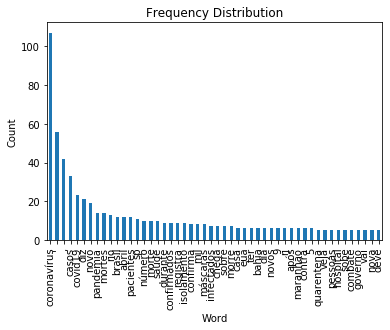

In [1954]:
# print most common words
series = pd.Series(data=[v for k, v in most_common], index=[k for k, v in most_common], name='')
ax = series.plot(kind='bar', title='Frequency Distribution')
ax.set_xlabel('Word')
ax.set_ylabel('Count')
plt.show()

In [1955]:
# Freq = Number of occurences / total number of words
fdist.freq('coronavírus')

0.06076093128904032

In [1956]:
def _untokenize_text(tokens):
    ls = []

    for tk_line in tokens:
        new_line = ''
        
        for word in tk_line:
            new_line += word + ' '
            
        ls.append(new_line)
        
    return ls

In [1957]:
X_train = _untokenize_text(X_train_tokens)
X_test = _untokenize_text(X_test_tokens)

In [1958]:
X_test = _untokenize_text(X_test_tokens)

In [1959]:
# create a count vectorizer object
vectorizer = CountVectorizer(ngram_range=(2,2))
X_train_vect = vectorizer.fit_transform(X_train)

In [1960]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_vect)

In [1961]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [1962]:
standalone_predictions = model.predict(X_train_tfidf)

In [1963]:
for doc, prediction in zip(texto, standalone_predictions):
    print('%r => %s' % (doc, prediction))

'brasil quase 600 mortos passa 12 mil casos coronavírus' => positivo
'precisa saber sobre covid19' => negativo
'itália menor número casos coronavírus 25 dias segundo dia seguido queda mortes' => positivo
"'coronavírus' mpt trt15 direcionam r$ 1 milhão hc unicamp comprar epis, remédios contratar serviços" => positivo
'campinas confirma novos casos chega 70 infectados covid19' => negativo
'sobe 207 número casos novo coronavírus maranhão, diz ses' => positivo
'covid19 europa preparando deixar confinamento' => positivo
"'coronavírus' valinhos apura sétima morte suspeita confirma novos casos positivos" => positivo
'covid19 moraes dá prazo estados comprovarem uso verba dívidas união' => positivo
'dia, pernambuco confirma 129 novos casos coronavírus, chegando 352 estado 34 mortes' => negativo
'acaba confinamento wuhan, primeiro epicentro covid19' => positivo
'demanda transporte rodoviário país cai quase 40% coronavírus, diz pesquisa' => negativo
'médico diz mundo precisa reinventar equipament

In [1964]:
def _get_accuracy(matrix):
    acc = 0
    n = 0
    total = 0
    
    for i in range(0, len(matrix)):
        for j in range(0, len(matrix)):
            if(i == j): 
                n += matrix[i,j]
            
            total += matrix[i,j]
            
    acc = n / total
    return acc

In [1965]:
# Text to Features
# Feature extraction from text 
# Method: bag of words
X_test_vect = vectorizer.transform(X_test)
print(X_test_vect.shape)

(122, 1283)


In [1966]:
tfidf_vetorizer = TfidfVectorizer(max_df=.90, min_df=2, max_features=1119)
tfidf = tfidf_vetorizer.fit_transform(df['titulo'])

In [1967]:
# TF-IDF: Term Frequency - Inverse Document Frequency
# use the transform(...) method to transform count-matrix to a tf-idf representation.
X_test_tfidf = tfidf_transformer.transform(X_test_vect)
print(X_test_tfidf.shape)

(122, 1283)


In [1968]:
#Make predictions on validation dataset
predictions = model.predict(X_test_tfidf)

In [1969]:
matrix = metrics.confusion_matrix(y_test, predictions)
print(matrix)

[[26 31]
 [ 9 56]]


In [1970]:
print(model.classes_)

['negativo' 'positivo']


In [1971]:
acc1 = np.mean(predictions == y_test)
acc2 = _get_accuracy(matrix)
print(acc1, acc2)

0.6721311475409836 0.6721311475409836


In [1972]:
for doc, prediction, y in zip(X_test[0:20], predictions[0:20], y_test[0:20]):
    print('%r => %s [%s]' % (doc, prediction, y))

'mortes covid19 frança passam 10 mil ' => negativo [negativo]
'franceses têm opção utilizar autorização digital sair casa durante confinamento ' => positivo [positivo]
'coronavírus campinas faz proposta alugar hospital sob intervenção prorroga iss micros pequenos ' => positivo [negativo]
'frança autoriza uso anestésico veterinário tratar doentes covid19 ' => positivo [positivo]
'80 passageiros cruzeiro australiano ancorado uruguai têm coronavírus ' => positivo [negativo]
'fazer compras mercado aplicativo , sair casa , meio pandemia coronavírus ? g1 faz tutorial dá dicas ' => positivo [positivo]
'ifood arrecada dinheiro campanha ação cidadania durante pandemia ' => positivo [positivo]
'lições três eventos catalisadores novo coronavírus europa ' => negativo [positivo]
'pernambuco 4 mortes 40 novos casos coronavírus ' => positivo [negativo]
'trump conformase papel gerente crise ' => positivo [negativo]
"' não queremos outros conseguindo máscaras ', diz trump sobre equipamentos produção co

In [1973]:
# performance analysis of the results
print(metrics.classification_report(y_test, predictions, target_names=model.classes_))

              precision    recall  f1-score   support

    negativo       0.74      0.46      0.57        57
    positivo       0.64      0.86      0.74        65

    accuracy                           0.67       122
   macro avg       0.69      0.66      0.65       122
weighted avg       0.69      0.67      0.66       122



In [1974]:
model_MNB = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

In [1975]:
model_SGD = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss = 'hinge', penalty = 'l2', alpha = 1e-3, random_state = 42, max_iter = 5, tol = None)),
])

In [1976]:
model_LR = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')),
])

In [1977]:
model_SVC = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SVC()),
])

In [1978]:
model_RF = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(random_state=1986,
                                  criterion='gini',
                                  max_depth=10,
                                  n_estimators=50,
                                  n_jobs=-1)),
])

In [1979]:
model_NB = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', BernoulliNB()),
])

In [1980]:
model_MNB.fit(X_train, y_train)
predictions_MNB = model_MNB.predict(X_test)

In [1981]:
matrix = metrics.confusion_matrix(y_test, predictions_MNB)
acc = _get_accuracy(matrix)
print(acc)

0.7540983606557377


In [1982]:
model_SGD.fit(X_train, y_train)
predictions_SGD = model_SGD.predict(X_test)

In [1983]:
matrix = metrics.confusion_matrix(y_test, predictions_SGD)
acc = _get_accuracy(matrix)
print(acc)

0.7459016393442623


In [1984]:
model_LR.fit(X_train, y_train)
predictions_LR = model_LR.predict(X_test)

In [1985]:
acc = _get_accuracy(matrix)
print(acc)

0.7459016393442623


In [1986]:
model_SVC.fit(X_train, y_train)
predictions_SVC = model_SVC.predict(X_test)

In [2119]:
matrix = metrics.confusion_matrix(y_test, predictions_SVC)
acc = _get_accuracy(matrix)
print(acc)

0.7704918032786885


In [2118]:
model_RF.fit(X_train, y_train)
prediction_RF = model_RF.predict(X_test)
matrix = metrics.confusion_matrix(y_test, prediction_RF)
acc = _get_accuracy(matrix)
print(acc)

0.7049180327868853


In [2120]:
model_NB.fit(X_train, y_train)
prediction_NB = model_NB.predict(X_test)
matrix = metrics.confusion_matrix(y_test, prediction_NB)
acc = _get_accuracy(matrix)
print(acc)

0.7786885245901639


In [1990]:
tokenized_titulos = df['titulo'].apply(lambda x: x.split())

In [1991]:
model_w2v = Word2Vec(
    tokenized_titulos,
    size=200,
    window=5,
    min_count=2,
    sg=1,
    hs=0,
    negative=10,
    workers=2,
    seed=34
)

2020-04-09 10:20:07,815 INFO collecting all words and their counts
2020-04-09 10:20:07,817 INFO PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-04-09 10:20:07,822 INFO collected 1529 word types from a corpus of 4110 raw words and 304 sentences
2020-04-09 10:20:07,823 INFO Loading a fresh vocabulary
2020-04-09 10:20:07,829 INFO effective_min_count=2 retains 409 unique words (26% of original 1529, drops 1120)
2020-04-09 10:20:07,830 INFO effective_min_count=2 leaves 2990 word corpus (72% of original 4110, drops 1120)
2020-04-09 10:20:07,835 INFO deleting the raw counts dictionary of 1529 items
2020-04-09 10:20:07,837 INFO sample=0.001 downsamples 71 most-common words
2020-04-09 10:20:07,838 INFO downsampling leaves estimated 1776 word corpus (59.4% of prior 2990)
2020-04-09 10:20:07,841 INFO estimated required memory for 409 words and 200 dimensions: 858900 bytes
2020-04-09 10:20:07,842 INFO resetting layer weights
2020-04-09 10:20:07,865 INFO training model with 2

In [1992]:
model_w2v.train(tokenized_titulos, total_examples=len(df['titulo']), epochs=20)

2020-04-09 10:20:08,043 INFO training model with 2 workers on 409 vocabulary and 200 features, using sg=1 hs=0 sample=0.001 negative=10 window=5
2020-04-09 10:20:08,050 INFO worker thread finished; awaiting finish of 1 more threads
2020-04-09 10:20:08,083 INFO worker thread finished; awaiting finish of 0 more threads
2020-04-09 10:20:08,084 INFO EPOCH - 1 : training on 4110 raw words (1735 effective words) took 0.0s, 48122 effective words/s
2020-04-09 10:20:08,093 INFO worker thread finished; awaiting finish of 1 more threads
2020-04-09 10:20:08,116 INFO worker thread finished; awaiting finish of 0 more threads
2020-04-09 10:20:08,118 INFO EPOCH - 2 : training on 4110 raw words (1789 effective words) took 0.0s, 64792 effective words/s
2020-04-09 10:20:08,124 INFO worker thread finished; awaiting finish of 1 more threads
2020-04-09 10:20:08,149 INFO worker thread finished; awaiting finish of 0 more threads
2020-04-09 10:20:08,151 INFO EPOCH - 3 : training on 4110 raw words (1808 effecti

(35504, 82200)

In [1993]:
model_w2v.wv.most_similar(positive='morte')

2020-04-09 10:20:08,730 INFO precomputing L2-norms of word weight vectors


[('registra', 0.999087929725647),
 ('novo', 0.9987707734107971),
 ('confirma', 0.9985164999961853),
 ('coronavírus;', 0.9981486201286316),
 ('Bahia', 0.9980825185775757),
 ('total', 0.9977428913116455),
 ('9', 0.9973076581954956),
 ('Maranhão', 0.9972703456878662),
 ('1ª', 0.9971768856048584),
 ('mortes', 0.9971603155136108)]

In [1994]:
model_w2v['coronavírus']

C:\Users\USUARIO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.1530915 , -0.09960462, -0.04714648, -0.04573692,  0.11810296,
       -0.00426554,  0.00839326,  0.02141966, -0.1113059 ,  0.18148717,
       -0.07191963, -0.03258288,  0.06019535, -0.09699877, -0.04850239,
        0.16095069,  0.04009615, -0.11717092,  0.01926887, -0.18788902,
        0.0727423 , -0.2556947 ,  0.07983546,  0.00896452, -0.10233932,
       -0.09235809,  0.0633134 , -0.21447375,  0.14698276,  0.00904944,
        0.00255025,  0.03590426, -0.08177594, -0.13035476,  0.04461944,
        0.06483533,  0.0054769 , -0.15540779, -0.02785299, -0.14575528,
        0.06874224, -0.0212821 ,  0.3244986 ,  0.03604101, -0.05007065,
       -0.052384  , -0.08656707,  0.07427822, -0.17535739,  0.02554993,
       -0.0046251 , -0.06601463,  0.09437621, -0.08633161, -0.11748422,
       -0.00804118,  0.0858845 ,  0.15615617,  0.07702954, -0.02874882,
        0.09540899,  0.04622018,  0.14489004,  0.0946082 , -0.07009552,
       -0.1095662 ,  0.14492808,  0.13408563, -0.2082134 ,  0.02

In [1995]:
len(model_w2v['coronavírus'])

C:\Users\USUARIO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


200

In [1996]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

In [1997]:
wordvec_arrays = np.zeros((len(tokenized_titulos), 200))

In [1998]:
wordvec_arrays

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [1999]:
for i in range(len(tokenized_titulos)):
    wordvec_arrays[i, :] = word_vector(tokenized_titulos[i], 200)
    

C:\Users\USUARIO\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [2000]:
from tqdm import tqdm
from gensim.models.doc2vec import LabeledSentence


In [2001]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ['tweet_' + str(i)]))
    return output

In [2002]:
labeled_tweets = add_label(tokenized_titulos)

C:\Users\USUARIO\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  after removing the cwd from sys.path.


In [2003]:
from gensim.models import Doc2Vec

In [2004]:
model_d2v = Doc2Vec(
    dm=1,
    dm_mean=1,
    vector_size=200,
    window=5,
    negative=7,
    min_count=5,
    workers=3,
    alpha=0.1,
    seed=23
)

In [2005]:
model_d2v.build_vocab( [i for i in tqdm(labeled_tweets)] )

100%|████████████████████████████████████████████████████████████████████████████| 304/304 [00:00<00:00, 304384.92it/s]
2020-04-09 10:20:09,052 INFO collecting all words and their counts
2020-04-09 10:20:09,054 INFO PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2020-04-09 10:20:09,059 INFO collected 1529 word types and 304 unique tags from a corpus of 304 examples and 4110 words
2020-04-09 10:20:09,061 INFO Loading a fresh vocabulary
2020-04-09 10:20:09,066 INFO effective_min_count=5 retains 119 unique words (7% of original 1529, drops 1410)
2020-04-09 10:20:09,067 INFO effective_min_count=5 leaves 2274 word corpus (55% of original 4110, drops 1836)
2020-04-09 10:20:09,070 INFO deleting the raw counts dictionary of 1529 items
2020-04-09 10:20:09,072 INFO sample=0.001 downsamples 97 most-common words
2020-04-09 10:20:09,073 INFO downsampling leaves estimated 929 word corpus (40.9% of prior 2274)
2020-04-09 10:20:09,075 INFO estimated required memory for 119 word

In [2006]:
model_d2v.train(labeled_tweets, total_examples=len(df['titulo']), epochs=15)

2020-04-09 10:20:09,110 INFO training model with 3 workers on 119 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=7 window=5
2020-04-09 10:20:09,118 INFO worker thread finished; awaiting finish of 2 more threads
2020-04-09 10:20:09,121 INFO worker thread finished; awaiting finish of 1 more threads
2020-04-09 10:20:09,137 INFO worker thread finished; awaiting finish of 0 more threads
2020-04-09 10:20:09,139 INFO EPOCH - 1 : training on 4110 raw words (1227 effective words) took 0.0s, 55336 effective words/s
2020-04-09 10:20:09,148 INFO worker thread finished; awaiting finish of 2 more threads
2020-04-09 10:20:09,150 INFO worker thread finished; awaiting finish of 1 more threads
2020-04-09 10:20:09,168 INFO worker thread finished; awaiting finish of 0 more threads
2020-04-09 10:20:09,170 INFO EPOCH - 2 : training on 4110 raw words (1250 effective words) took 0.0s, 54085 effective words/s
2020-04-09 10:20:09,177 INFO worker thread finished; awaiting finish of 2 more thr

In [2007]:
docvec_arrays = np.zeros((len(tokenized_titulos), 200))

In [2008]:
for i in range(len(df)):
    docvec_arrays[i, :] = model_d2v.docvecs[i].reshape((1, 200))

In [2009]:
docvec_df = pd.DataFrame(docvec_arrays)

In [2010]:
docvec_df.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.061944,0.054060,0.001370,0.047980,-0.010790,-0.043863,-0.079753,-0.051474,0.007039,0.046167,...,0.028341,0.021760,0.031015,-0.030728,0.112770,0.042552,0.052555,0.004654,0.027285,0.082166
1,0.035694,0.031097,0.000646,0.024568,-0.004049,-0.023577,-0.047602,-0.026493,0.005422,0.023910,...,0.014907,0.015902,0.015512,-0.017921,0.064476,0.024934,0.027864,0.004875,0.012427,0.049015
2,0.049172,0.044396,-0.000264,0.035385,-0.010643,-0.036241,-0.068551,-0.043833,0.006418,0.038179,...,0.025009,0.020577,0.025324,-0.025979,0.094228,0.035138,0.044512,0.007778,0.020718,0.069334
3,0.051602,0.045073,0.002276,0.036885,-0.006769,-0.037779,-0.063825,-0.041386,0.005026,0.034926,...,0.022255,0.022924,0.021064,-0.024469,0.087667,0.032579,0.044730,0.005401,0.020940,0.065209
4,0.067123,0.060837,0.001261,0.050685,-0.007161,-0.054158,-0.094832,-0.058043,0.005099,0.054447,...,0.034156,0.026637,0.032400,-0.036911,0.124799,0.047349,0.063494,0.011503,0.033002,0.090887


In [2011]:
docvec_df.shape

(304, 200)

In [2012]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [2013]:
bow_vectorizer = CountVectorizer(max_df=.90, min_df=2, max_features=1000)

In [2014]:
bow = bow_vectorizer.fit_transform(df['titulo'])

In [2015]:
train_bow = bow[:31962, :]
test_bow = bow[31962:, :]

In [2016]:
X_train_bow, X_test_bow, y_train, y_test = train_test_split(train_bow, df['classes'],test_size=.3, random_state=42)

In [2017]:
lr = LogisticRegression()

In [2018]:
lr.fit(X_train_bow, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [2019]:
pred = lr.predict_proba(X_test_bow)

In [2020]:
pred_int = pred[:, 1] >= 0.3

In [2021]:
pred_int = pred_int.astype(np.int)

In [2022]:
import logging
import numpy as np
from optparse import OptionParser
import sys
from time import time
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics

In [2113]:
# Construindo exemplos para treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(texto, classe, test_size=0.4,random_state=40)

if opts.use_hashing:
    vectorizer = CountVectorizer(ngram_range=(1,1))
    X_train_vect = vectorizer.transform(X_train)
    
else:
    vectorizer = TfidfVectorizer(max_df=.90, min_df=2, max_features=1119)
    X_train_vect = vectorizer.fit_transform(X_train)

X_test_vect = vectorizer.transform(X_test)

# mapping from integer feature name to original token string
if opts.use_hashing:
    feature_names = None
else:
    feature_names = vectorizer.get_feature_names()

if opts.select_chi2:
    print("Extracting %d best features by a chi-squared test" %
          opts.select_chi2)
    t0 = time()
    ch2 = SelectKBest(chi2, k=opts.select_chi2)
    X_train = ch2.fit_transform(X_train, y_train)
    X_test = ch2.transform(X_test)
    if feature_names:
        # keep selected feature names
        feature_names = [feature_names[i] for i
                         in ch2.get_support(indices=True)]
    print("done in %fs" % (time() - t0))
    print()

if feature_names:
    feature_names = np.asarray(feature_names)


def trim(s):
    """Trim string to fit on terminal (assuming 80-column display)"""
    return s if len(s) <= 80 else s[:77] + "..."

In [2114]:
def benchmark(clf):
    print('_' * 80)
    print("Training: ")
    print(clf)
    clf.fit(X_train_vect, y_train)
    #train_time = time() - t0
    #print("train time: %0.3fs" % train_time)

    
    pred = clf.predict(X_test_vect)
    #test_time = time() - t0
    #print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)

    if hasattr(clf, 'coef_'):
        print("dimensionality: %d" % clf.coef_.shape[1])
        print("density: %f" % density(clf.coef_))

        if opts.print_top10 and feature_names is not None:
            print("top 10 keywords per class:")
            for i, label in enumerate(target_names):
                top10 = np.argsort(clf.coef_[i])[-10:]
                print(trim("%s: %s" % (label, " ".join(feature_names[top10]))))
        print()

    if opts.print_report:
        print("classification report:")
        print(metrics.classification_report(y_test, pred,
                                            target_names=target_names))

    if opts.print_cm:
        print("confusion matrix:")
        print(metrics.confusion_matrix(y_test, pred))

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score


results = []


In [2115]:
for clf, name in (
        (RidgeClassifier(tol=1e-2, solver="sag"), "Ridge Classifier"),
        (Perceptron(max_iter=50), "Perceptron"),
        (PassiveAggressiveClassifier(max_iter=50),
         "Passive-Aggressive"),
        (KNeighborsClassifier(n_neighbors=10), "kNN"),
        (RandomForestClassifier(), "Random forest")):
    print('=' * 80)
    print(name)
    results.append(benchmark(clf))

for penalty in ["l2", "l1"]:
    print('=' * 80)
    print("%s penalty" % penalty.upper())
    # Train Liblinear model
    results.append(benchmark(LinearSVC(penalty=penalty, dual=False,
                                       tol=1e-3)))

    # Train SGD model
    results.append(benchmark(SGDClassifier(alpha=.0001, max_iter=50,
                                           penalty=penalty)))

# Train SGD with Elastic Net penalty
print('=' * 80)
print("Elastic-Net penalty")
results.append(benchmark(SGDClassifier(alpha=.0001, max_iter=50,
                                       penalty="elasticnet")))

# Train NearestCentroid without threshold
print('=' * 80)
print("NearestCentroid (aka Rocchio classifier)")
results.append(benchmark(NearestCentroid()))

# Train sparse Naive Bayes classifiers
print('=' * 80)
print("Naive Bayes")
results.append(benchmark(MultinomialNB(alpha=.01)))
results.append(benchmark(BernoulliNB(alpha=.01)))
results.append(benchmark(ComplementNB(alpha=.1)))

print('=' * 80)
print("LinearSVC with L1-based feature selection")
# The smaller C, the stronger the regularization.
# The more regularization, the more sparsity.
results.append(benchmark(Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False,
                                                  tol=1e-3))),
  ('classification', LinearSVC(penalty="l2"))])))

Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None, solver='sag',
                tol=0.01)
accuracy:   0.697
dimensionality: 204
density: 1.000000


Perceptron
________________________________________________________________________________
Training: 
Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=50, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)
accuracy:   0.664
dimensionality: 204
density: 0.906863


Passive-Aggressive
________________________________________________________________________________
Training: 
PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                      

C:\Users\USUARIO\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '


accuracy:   0.754

L2 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
          verbose=0)
accuracy:   0.689
dimensionality: 204
density: 1.000000


________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=50,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
accuracy:   0.672
dimensionality: 204
density: 0.946078


L1 penalty
_______

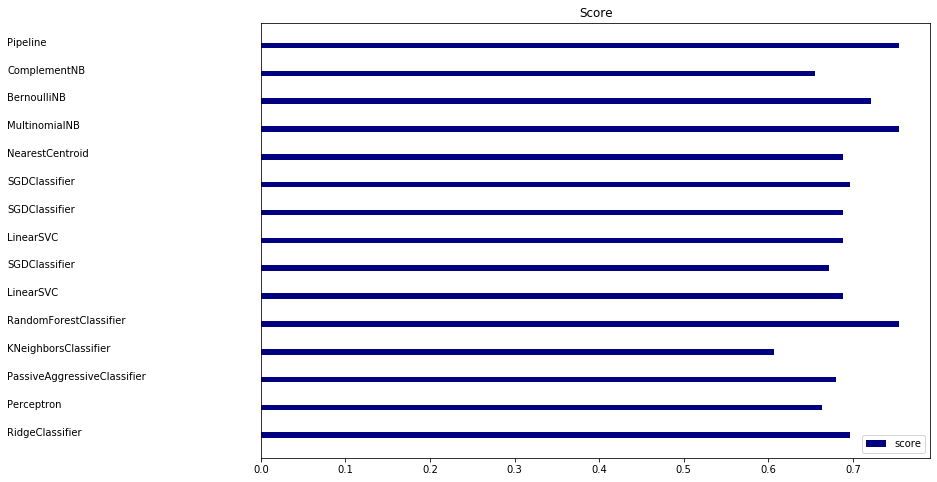

In [2157]:
indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(2)]

clf_names, score = results

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.yticks(())
plt.legend(loc='best')
for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()

In [2117]:
results

[('RidgeClassifier', 0.6967213114754098),
 ('Perceptron', 0.6639344262295082),
 ('PassiveAggressiveClassifier', 0.680327868852459),
 ('KNeighborsClassifier', 0.6065573770491803),
 ('RandomForestClassifier', 0.7540983606557377),
 ('LinearSVC', 0.6885245901639344),
 ('SGDClassifier', 0.6721311475409836),
 ('LinearSVC', 0.6885245901639344),
 ('SGDClassifier', 0.6885245901639344),
 ('SGDClassifier', 0.6967213114754098),
 ('NearestCentroid', 0.6885245901639344),
 ('MultinomialNB', 0.7540983606557377),
 ('BernoulliNB', 0.7213114754098361),
 ('ComplementNB', 0.6557377049180327),
 ('Pipeline', 0.7540983606557377)]

In [2070]:
indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [2085]:
from sklearn.externals import joblib

C:\Users\USUARIO\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,

In [2121]:
joblib.dump(model_SVC, 'model.pkl')

['model.pkl']

In [2122]:
model = joblib.load('model.pkl')

In [2150]:
news = pd.read_excel('news.xlsx')

In [2151]:
news = news.drop(columns='Unnamed: 0')

In [2154]:
# Aplica a função em todos os dados:
df['titulo'] = [Preprocessing(i) for i in df['titulo']]

In [2155]:
all_words = [word for tokens in news['titulo'] for word in tokens]
sentence_lengths = [len(tokens) for tokens in news['titulo']]
VOCAB = sorted(list(set(all_words)))

In [2134]:
def _tokenize_text(data):
    ls = []

    for line in data:
        tokens = wordpunct_tokenize(line)
        ls.append(tokens)

    return ls

In [2135]:
X_train_tokens = _tokenize_text(news['titulo'])

In [2136]:
def _apply_standardization(tokens, std_list):
    ls = []

    for tk_line in tokens:
        new_tokens = []
        
        for word in tk_line:
            if word.lower() in std_list:
                word = std_list[word.lower()]
                
            new_tokens.append(word) 
            
        ls.append(new_tokens)

    return ls

In [2137]:
def _remove_stopwords(tokens, stopword_list):
    ls = []

    for tk_line in tokens:
        new_tokens = []
        
        for word in tk_line:
            if word.lower() not in stopword_list:
                new_tokens.append(word) 
            
        ls.append(new_tokens)
        
    return ls

In [2138]:
# list of array
custom_stopwords = stopwords.values.tolist()

In [2139]:
# transform list of array to list
custom_stopwords = [s[0] for s in custom_stopwords]

In [2140]:
X_train_tokens = _remove_stopwords(X_train_tokens, custom_stopwords)

In [2141]:
#criar gráfico de núvem
def _get_text_cloud(tokens):
    text = ''

    for tk_line in tokens:
        new_tokens = []
        
        for word in tk_line:
            text += word + ' '
        
    return text

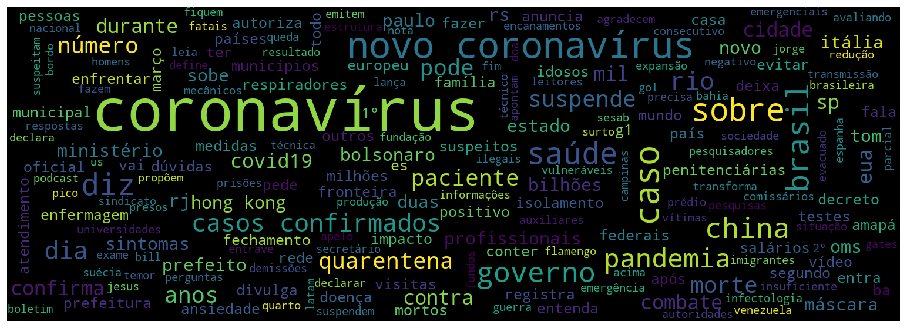

In [2142]:
# print train WordCloud
sample_train = random.sample(X_train_tokens, 100)
text_cloud = _get_text_cloud(sample_train)

word_cloud = WordCloud(max_font_size = 100, width = 1520, height = 535)
word_cloud.generate(text_cloud)
plt.figure(figsize = (16, 9))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [2156]:
news['classes'] = model.predict(news)

ValueError: Length of values does not match length of index

In [2158]:
df.head()

,titulo,Link,data,classes
0,Brasil tem quase 600 mortos e passa de 12 mil ...,https://g1.globo.com/bemestar/coronavirus/noti...,2007-04-20,negativo
1,O que você precisa saber sobre a Covid-19,https://g1.globo.com/bemestar/coronavirus/noti...,2027-02-20,positivo
2,Itália tem menor número de casos de coronavíru...,https://g1.globo.com/mundo/noticia/2020/04/07/...,2007-04-20,positivo
3,'Coronavírus': MPT e TRT-15 direcionam mais R$...,https://g1.globo.com/sp/campinas-regiao/notici...,2007-04-20,positivo
4,Campinas confirma novos casos e chega a 70 inf...,https://g1.globo.com/sp/campinas-regiao/notici...,2007-04-20,negativo


In [2153]:
news.head()

,titulo,Link,data
0,Brasil tem quase 600 mortos e passa de 12 mil ...,https://g1.globo.com/bemestar/coronavirus/noti...,2007-04-20
1,O que você precisa saber sobre a Covid-19,https://g1.globo.com/bemestar/coronavirus/noti...,2027-02-20
2,Itália tem menor número de casos de coronavíru...,https://g1.globo.com/mundo/noticia/2020/04/07/...,2007-04-20
3,'Coronavírus': MPT e TRT-15 direcionam mais R$...,https://g1.globo.com/sp/campinas-regiao/notici...,2007-04-20
4,Campinas confirma novos casos e chega a 70 inf...,https://g1.globo.com/sp/campinas-regiao/notici...,2007-04-20
